# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
df.shape

(2035, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
df=df.loc[::-1].reset_index(drop=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2034,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [10]:
df1=df.reset_index()['Open']
df1.shape

(2035,)

In [11]:
df1

0       122.10
1       120.30
2       121.80
3       120.10
4       117.60
         ...  
2030    233.55
2031    233.30
2032    240.00
2033    234.55
2034    234.05
Name: Open, Length: 2035, dtype: float64

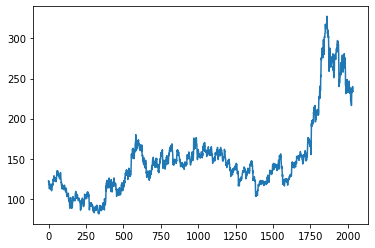

In [12]:
plt.plot(df1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(2035, 1)

In [15]:
df1

array([[0.16626115],
       [0.15896188],
       [0.16504461],
       ...,
       [0.64436334],
       [0.62226277],
       [0.6202352 ]])

In [16]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
test_data.shape

(713, 1)

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(1221, 100, 1)
(1221,)
(612, 100, 1)
(612,)


(None, None)

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [25]:
regressor = Sequential([
                        #First LSTM Layer with dropout regularization
                        LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
                        Dropout(0.2),
                        #Second LSTM Layer with dropout regularization
                        LSTM(units = 50, return_sequences = True),
                        Dropout(0.2),
                        #Third LSTM Layer with dropout regularization
                        LSTM(units = 50, return_sequences = True),
                        Dropout(0.2),
                        #Fourth LSTM Layer with dropout regularization
                        LSTM(units = 50),
                        Dropout(0.2),
                        #Output Layer
                        Dense(units = 1)
])

In [26]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 4s 95ms/step - loss: 0.0070
Epoch 2/100
39/39 [==============================] - 4s 95ms/step - loss: 0.0017
Epoch 3/100
39/39 [==============================] - 4s 100ms/step - loss: 0.0015
Epoch 4/100
39/39 [==============================] - 4s 101ms/step - loss: 0.0017
Epoch 5/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0014
Epoch 6/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0013
Epoch 7/100
39/39 [==============================] - 4s 99ms/step - loss: 0.0012
Epoch 8/100
39/39 [==============================] - 4s 98ms/step - loss: 0.0012
Epoch 9/100
39/39 [==============================] - 4s 96ms/step - loss: 0.0012
Epoch 10/100
39/39 [==============================] - 4s 95ms/step - loss: 0.0012: 1s -
Epoch 11/100
39/39 [==============================] - 4s 102ms/step - loss: 0.0012
Epoch 12/100
39/39 [==============================] - 4s 101ms/step - loss: 9.9794e-04
Epoch 13/10

In [28]:
test_predict=regressor.predict(X_test)

In [29]:
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

196.56772043841164

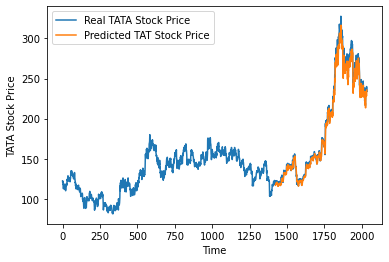

In [31]:
look_back=100
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label = 'Real TATA Stock Price')
# plot test predictions
plt.plot(testPredictPlot,label = 'Predicted TAT Stock Price')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [32]:
len(test_data)

713

In [33]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.8714517437145175,
 0.8454987834549879,
 0.8590835360908353,
 0.82441200324412,
 0.8065693430656933,
 0.7110705596107054,
 0.6443633414436334,
 0.6585563665855636,
 0.6780210867802108,
 0.6609894566098945,
 0.6605839416058394,
 0.6707218167072181,
 0.6889699918896999,
 0.6938361719383617,
 0.7039740470397404,
 0.7149229521492293,
 0.7011354420113545,
 0.7538523925385239,
 0.764801297648013,
 0.745742092457421,
 0.7072181670721815,
 0.7366180048661801,
 0.7534468775344687,
 0.740470397404704,
 0.748175182481752,
 0.7366180048661801,
 0.7538523925385239,
 0.7652068126520681,
 0.8031224655312246,
 0.7723033252230334,
 0.7848742903487427,
 0.740470397404704,
 0.7175587996755881,
 0.7169505271695051,
 0.7258718572587186,
 0.7449310624493106,
 0.7461476074614761,
 0.7376317923763178,
 0.7364152473641523,
 0.7700729927007299,
 0.7437145174371451,
 0.810624493106245,
 0.7962287104622869,
 0.7652068126520681,
 0.7589213300892133,
 0.789943227899432,
 0.7854825628548256,
 0.7676399026763989,
 

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

2035

In [39]:
2035-100

1935

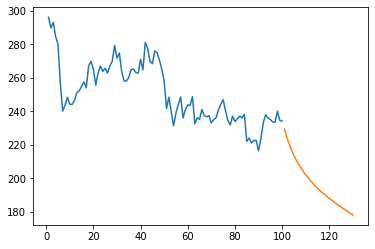

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))